In [43]:
import numpy as np
import matplotlib.pyplot as plt
import GeodeticTools as gt
import FileReader as fr
import LegendrePoly as lp
import GravityFeildAndPotentialMaker as gfpm
import LsCalo as lc

In [9]:
a = 6378137.0
b = 6356752.314140
GM = 3986005 * 10**8
e2 = 0.00669438002290
mm = 0.00344978600308
f = 0.00335281068118
a_model = 6.3781366000E+06
GM_model = 3.9860044180E+14

gc = gt.GeodeticCalculations(a, e2, f, mm)
GC = gfpm.GravityCalculator(1)

In [10]:
GGM = 'EGM2008.gfc'
anm,bnm,num = fr.CoffMaker(GGM)

In [11]:
J2_8 = np.array([
    1, 
    0, 
    -1 * (1.08263 * 10**-3) / np.sqrt(5), 
    0, 
    0.00000237091222 / np.sqrt(9), 
    0,
    -1 * 0.00000000608347 / np.sqrt(13), 
    0, 
    0.00000000001427 / np.sqrt(17)
])


Norm_Scal = np.array([
    1, 
    0, 
    J2_8[2] * (GM / GM_model) * (a / a_model)**2, 
    0, 
    J2_8[4] * (GM / GM_model) * (a / a_model)**4, 
    0, 
    J2_8[6] * (GM / GM_model) * (a / a_model)**6, 
    0, 
    J2_8[8] * (GM / GM_model) * (a / a_model)**8
])


anm[2:8,0]= anm[2:8,0]-Norm_Scal[2:8].T

In [12]:
landa,phi  = np.meshgrid(np.arange(40, 65, 0.5),np.arange(20, 45, 0.5))

phi_flat = phi.flatten()
lambda_flat = landa.flatten()
height = 1000

In [13]:
lmax = num

Tn_Potential = np.zeros((len(phi_flat),1))
geoid_height = np.zeros((len(phi_flat),1))
Dgn = np.zeros((len(phi_flat),1))
Dgd = np.zeros((len(phi_flat),1))
Trr = np.zeros((len(phi_flat),1))

for i in range(0,len(phi_flat),1):
    latitude    = phi_flat[i]
    longitude = lambda_flat[i]

    rp = gc.radius_physical(latitude, longitude, height)
    rg = gc.radius_geoid(latitude, longitude)
    gamma = gc.gammas_grs80(latitude, height)
    plm = lp.LegendreCoff(latitude, lmax)
    
    
    Tn_Potential[i] = (GM / a) * GC.Tn(lmax, anm, bnm, longitude, rg, a, plm)
    geoid_height[i] = (GM / (a * gamma)) * GC.Tn(lmax, anm, bnm, longitude, rg, a, plm)
    Dgn[i] = (GM / a) * GC.Dg_n(lmax, anm, bnm, longitude, rg, a, plm)*10**5
    Dgd[i] = (GM / a) * GC.Dg_d(lmax, anm, bnm, longitude, rp, a, plm)*10**5
    Trr[i] = (GM / a**3)*GC.T_rr(lmax, anm, bnm, longitude, rp, a, plm)*10**9

    # print(geoid_height[i])



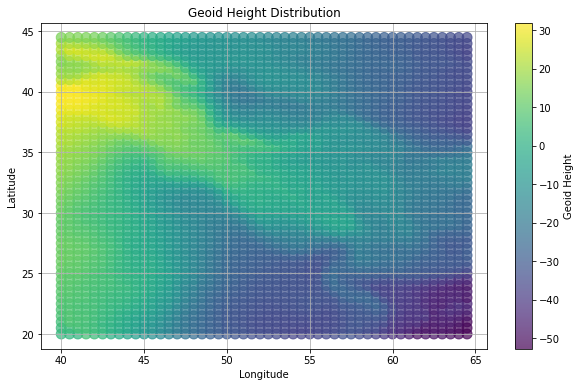

In [14]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(lambda_flat, phi_flat, c=geoid_height, s=100, cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Geoid Height')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geoid Height Distribution')
plt.grid(True)
plt.show()


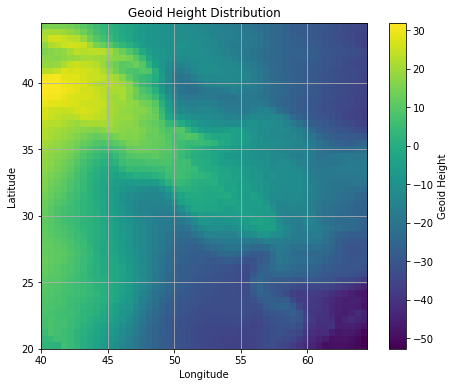

In [100]:
shape_landa = np.shape(landa)
geoid_height_reshape = np.reshape(geoid_height,shape_landa)

plt.figure(figsize=(8, 6))
plt.imshow(geoid_height_reshape, extent=[landa.min(), landa.max(), phi.min(), phi.max()], origin='lower', cmap='viridis')
plt.colorbar(label='Geoid Height')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geoid Height Distribution')
plt.grid(True)
plt.show()

In [92]:

lat , lon = np.meshgrid(np.arange(40, 41.1, 0.1),np.arange(20, 21.1, 0.1))
lat_flat = lat.flatten()
lon_flat = lon.flatten()
height = 1000


lmax = num

Tn_Potential_1_deg = np.zeros((len(lat_flat),1))
geoid_height_1_deg = np.zeros((len(lat_flat),1))
Dgn_1_deg = np.zeros((len(lat_flat),1))
Dgd_1_deg = np.zeros((len(lat_flat),1))
Trr_1_deg = np.zeros((len(lat_flat),1))

for i in range(0,len(lat_flat),1):
    latitude    = lat_flat[i]
    longitude = lon_flat[i]

    rp = gc.radius_physical(latitude, longitude, height)
    rg = gc.radius_geoid(latitude, longitude)
    gamma = gc.gammas_grs80(latitude, height)
    plm = lp.LegendreCoff(latitude, lmax)
    
    
    Tn_Potential_1_deg[i] = (GM / a) * GC.Tn(lmax, anm, bnm, longitude, rg, a, plm)
    geoid_height_1_deg[i] = (GM / (a * gamma)) * GC.Tn(lmax, anm, bnm, longitude, rg, a, plm)
    Dgn_1_deg[i] = (GM / a) * GC.Dg_n(lmax, anm, bnm, longitude, rg, a, plm)*10**5
    Dgd_1_deg[i] = (GM / a) * GC.Dg_d(lmax, anm, bnm, longitude, rp, a, plm)*10**5
    Trr_1_deg[i] = (GM / a**3)*GC.T_rr(lmax, anm, bnm, longitude, rp, a, plm)*10**9

    # print(geoid_height[i])


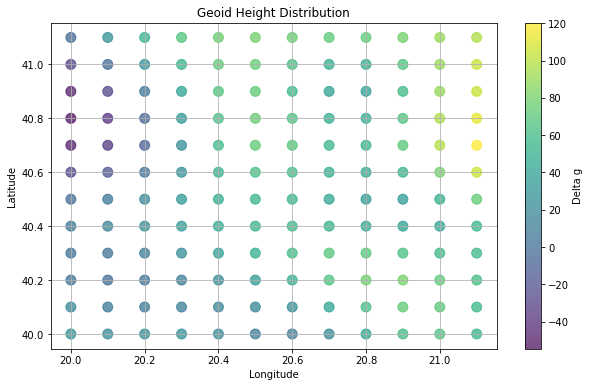

In [102]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(lon_flat, lat_flat, c=Dgd_1_deg, s=100, cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Delta g')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geoid Height Distribution')
plt.grid(True)
plt.show()

In [103]:
import LeastSquareCalocation as lc
LsC = lc.LSCalocation()

p = 3
X = lon_flat[0:len(lon_flat)+1:p]
Y = lat_flat[0:len(lat_flat)+1:p]
G = Dgd_1_deg[0:len(Dgd_1_deg)+1:p]
Xi = lon_flat
Yi = lat_flat
N = np.ones((len(X),1))*10**(-6)

covariance, covdist = LsC.spatial_cov(X, Y, G)
C0, D = LsC.expcovarfit(X, Y, G, covariance, covdist, 'no')
C0 = 1506.67702305717
D = 0.276810785669861
Gi = LsC.LSCexponential(Xi, Yi, X, Y, C0, D, N, G)



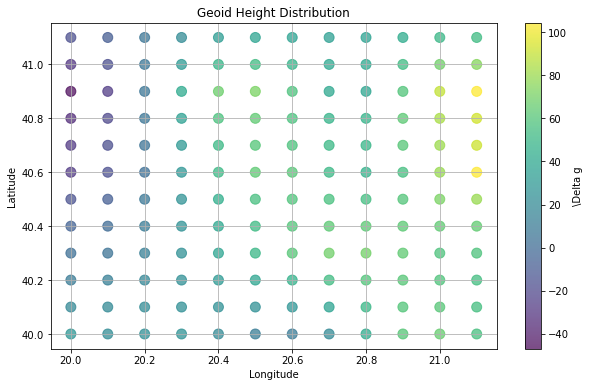

In [104]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(lon_flat, lat_flat, c=Gi, s=100, cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='\Delta g')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geoid Height Distribution')
plt.grid(True)
plt.show()